<a href="https://colab.research.google.com/github/WilliamAshbee/DataminingAssignments/blob/main/CovidSeverityPredictionExplore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the bonus, I attempted supervised learning on this dataset, but the classifiers didn't predict severity better than random, so I chose to do clustering instead. I didn't see too many csv datasets useful for simple classification. 

dataset
https://www.kaggle.com/iamhungundji/covid19-symptoms-checker \
bonus work dataset: predict severity\
https://github.com/WilliamAshbee/DataminingAssignments/blob/main/covid-cleaned-data.csv


In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/WilliamAshbee/DataminingAssignments/main/covid-cleaned-data.csv'
df_cov = pd.read_csv(url,error_bad_lines=False)

In [4]:
df_cov.shape

(316800, 27)

In [5]:
df_cov.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [6]:
columns = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country']
cmap = dict()
for i in range(len(columns)):
  cmap[columns[i]] = i 

yfcols = [ 'Severity_Severe']

yfinds = [cmap[col] for col in yfcols]

ycols = [  'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe']

yinds = [cmap[col] for col in ycols]


print(yinds,yfinds)

[19, 20, 21, 22] [22]


In [7]:
df_nump = df_cov.to_numpy()

In [9]:
xind = []
for i in range(len(columns)-1):
  if i not in yinds:
    xind.append(i)
print(xind)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 23, 24, 25]


In [10]:
X = df_nump[:,xind].astype(float)
print(X)
np.random.seed(seed=0)
args = np.random.choice(X.shape[0], (int)(X.shape[0]/10.0))
X = X[args]

[[1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


One method for determining number of clusters I found here: \
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

In [12]:

from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      for j in range(points.shape[1]):
        curr_sse += (points[i, j] - curr_center[j]) ** 2 
      
    sse.append(curr_sse)
  return sse


In [13]:
wss_list = calculate_WSS(X,4)



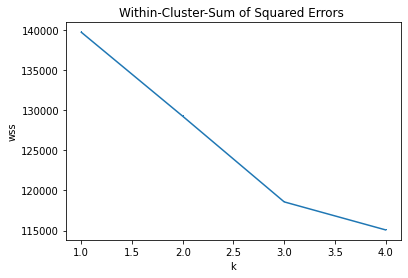

In [14]:
import matplotlib.pyplot as plt
xs = [i for i in range(1,5)]

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('wss')
ax1.set_xlabel('k')
ax1.set_title('Within-Cluster-Sum of Squared Errors ')

plt.plot(xs,wss_list,',-')


Within this dataset, it is likely that there are 3 clusters of patients. If this dataset is clean relating to patients, then I would guess the clusters relate to either severity or disease type. 

For n_clusters = 2 The average silhouette_score is : 0.07440032508447585
For n_clusters = 3 The average silhouette_score is : 0.115307283219954
For n_clusters = 4 The average silhouette_score is : 0.08487409008477939


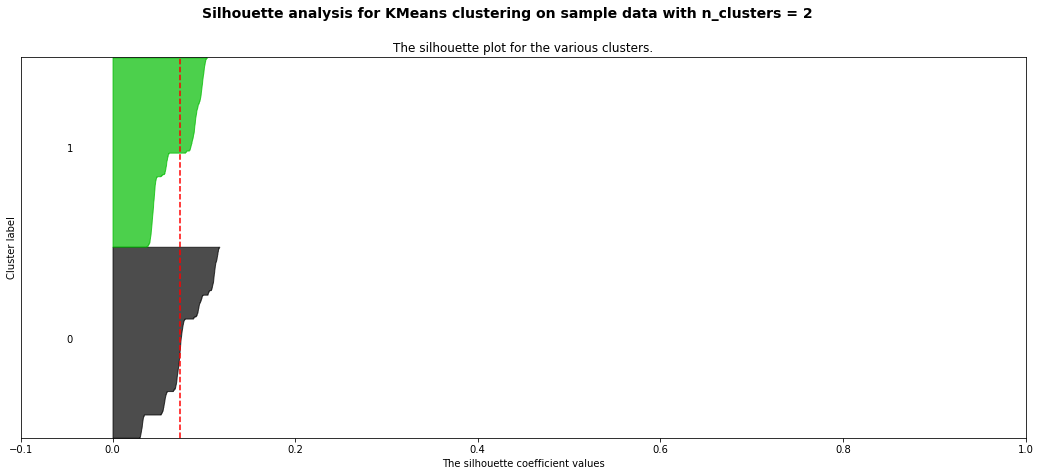

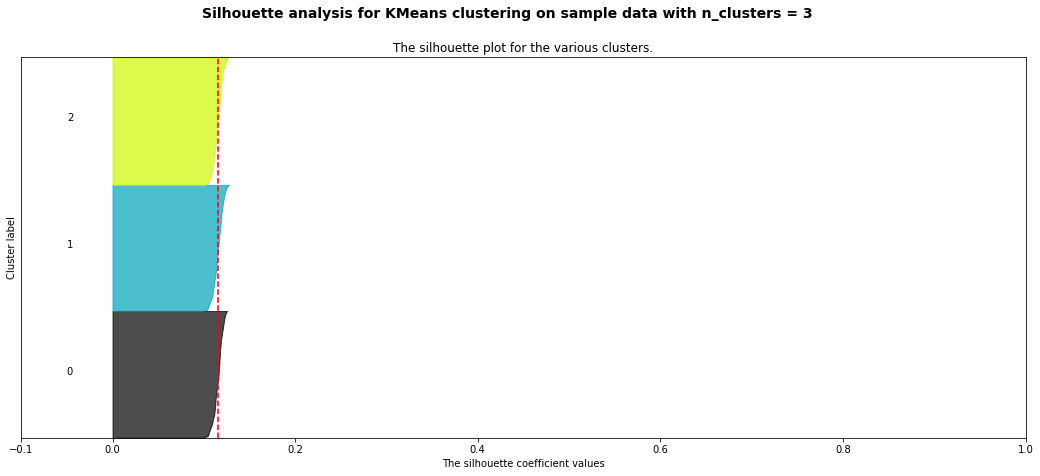

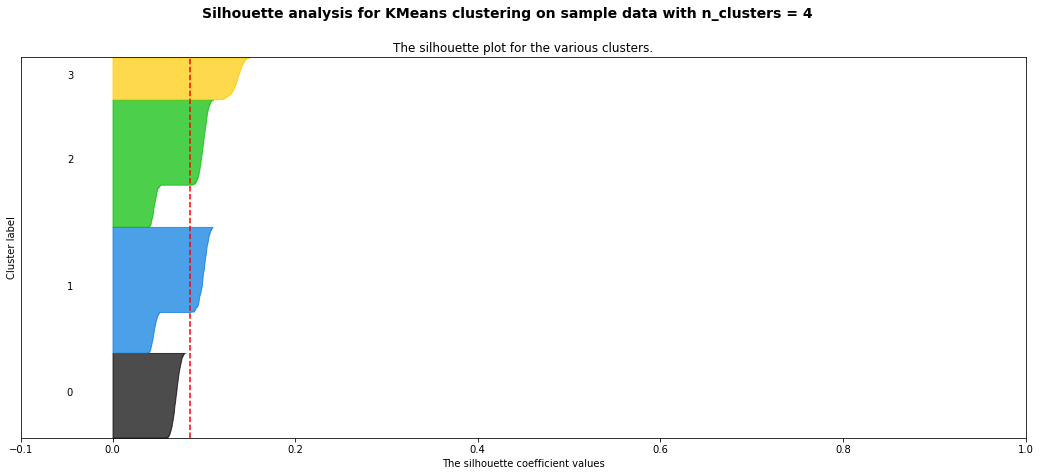

In [22]:
import matplotlib.cm as cm

for n_clusters in range(2,5):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    
    
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


Visual inspection of K means clustering and silhouette analysis shows that the number of clusters is 3 here as well most likely due to fewest below average clusters being associated with 3 clusters.


I borrowed analysis from 
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.0480104815843096
For n_clusters = 3 The average silhouette_score is : 0.059870279796481636
For n_clusters = 4 The average silhouette_score is : 0.06434913925064094
For n_clusters = 5 The average silhouette_score is : 0.07254573065366668
For n_clusters = 6 The average silhouette_score is : 0.0783746476188924


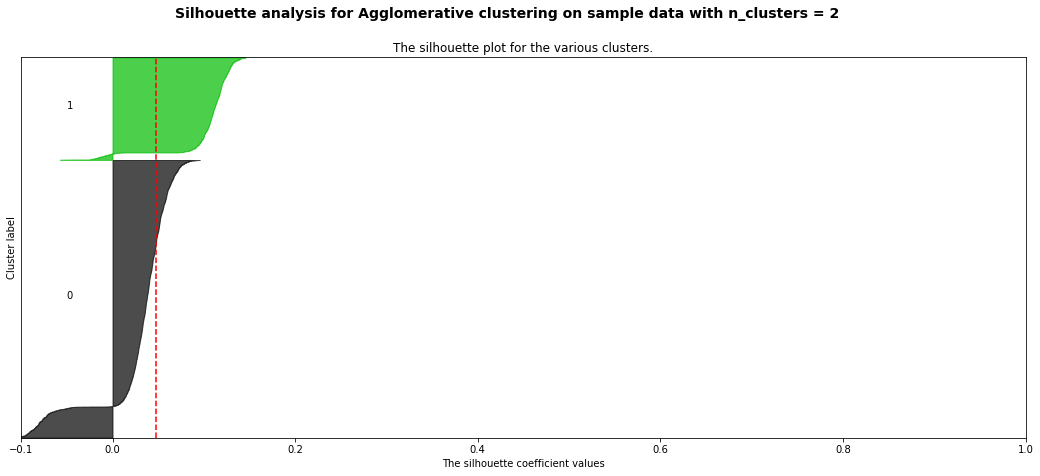

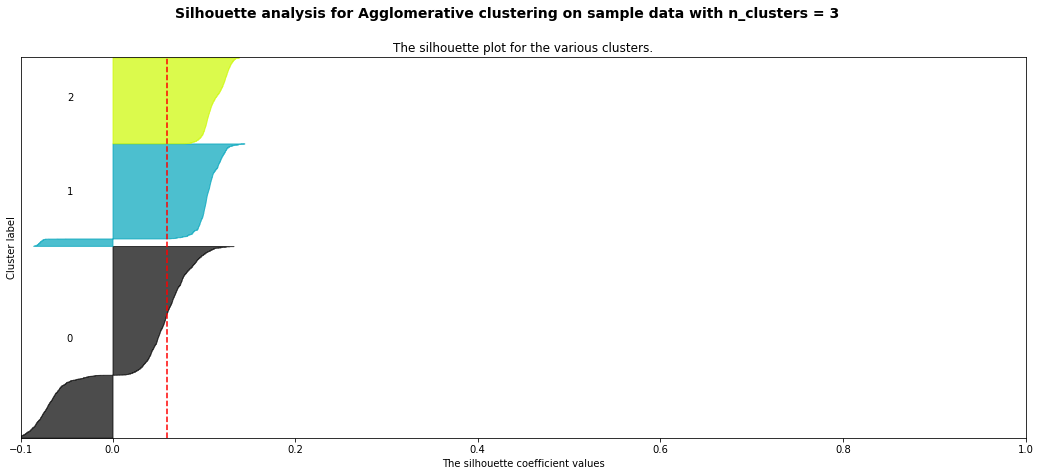

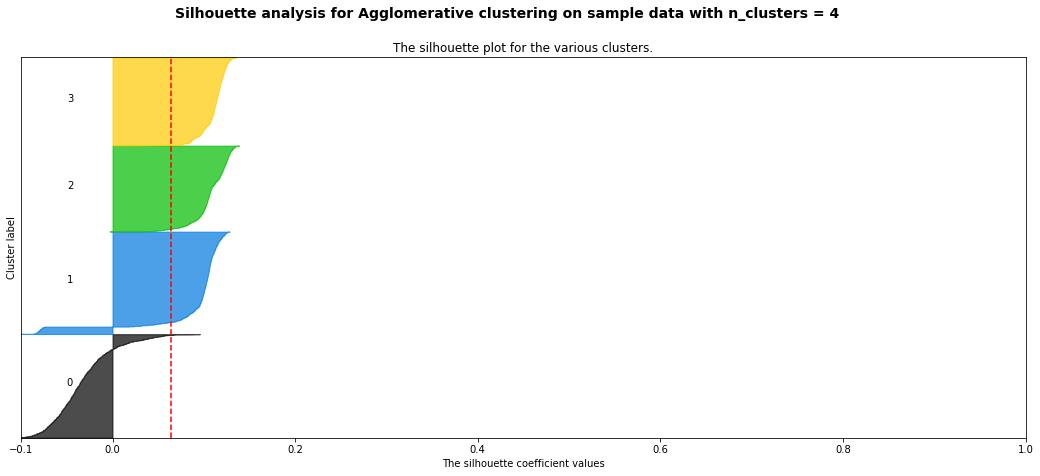

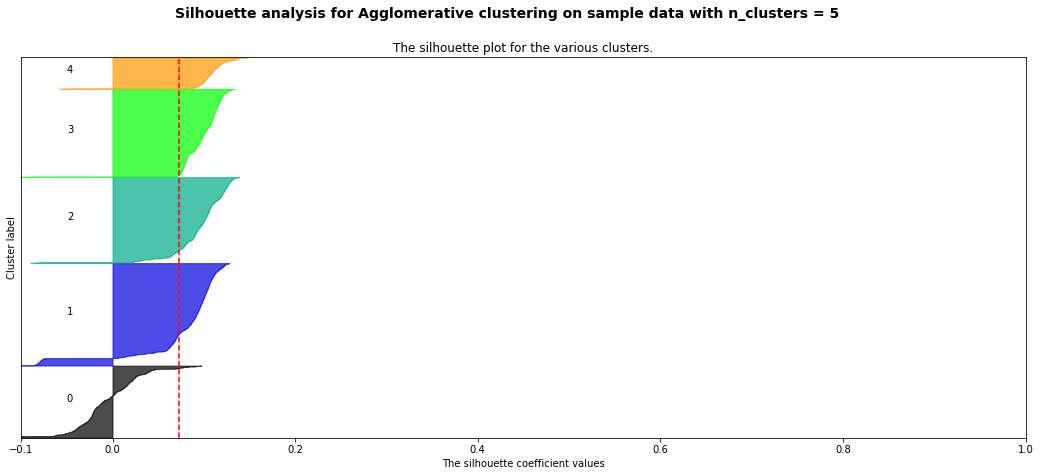

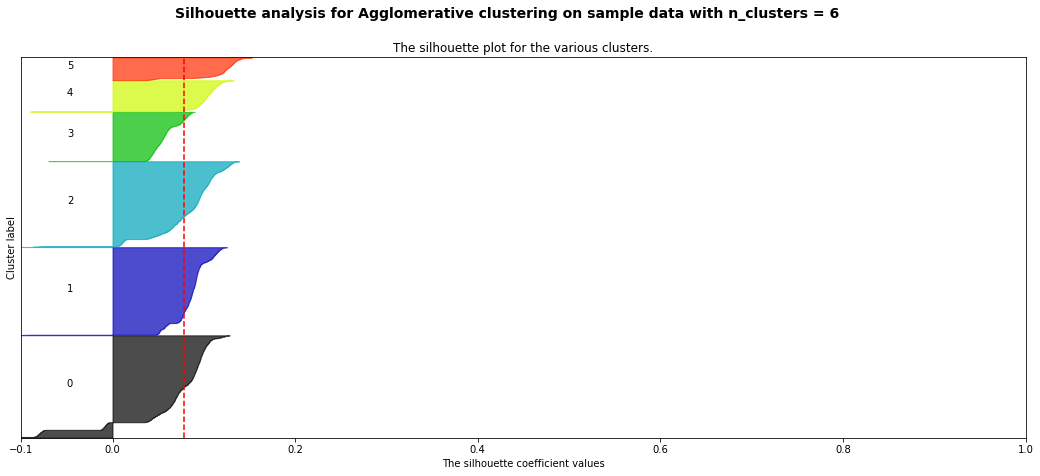

In [26]:
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering


for n_clusters in range(2,7):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    
    plt.suptitle(("Silhouette analysis for Agglomerative clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


Overall, I would say that the silhouette score was not particularly strong in either kmeans or agglomerative clustering, but within agglomerative clustering there always is substantial data under the average in agglomerative clustering. My inference is that this dataset is not particularly useful for either clustering (shown) or classification of symptom severity (not shown, but no predictions were better than random on any classifier, thus that analysis was discarded in favor of clustering) 